# Определение возраста клиентов

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
Контролировать добросовестность кассиров при продаже алкоголя.
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

# Исследовательский анализ данных

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [3]:
labels.shape

(7591, 2)

In [4]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


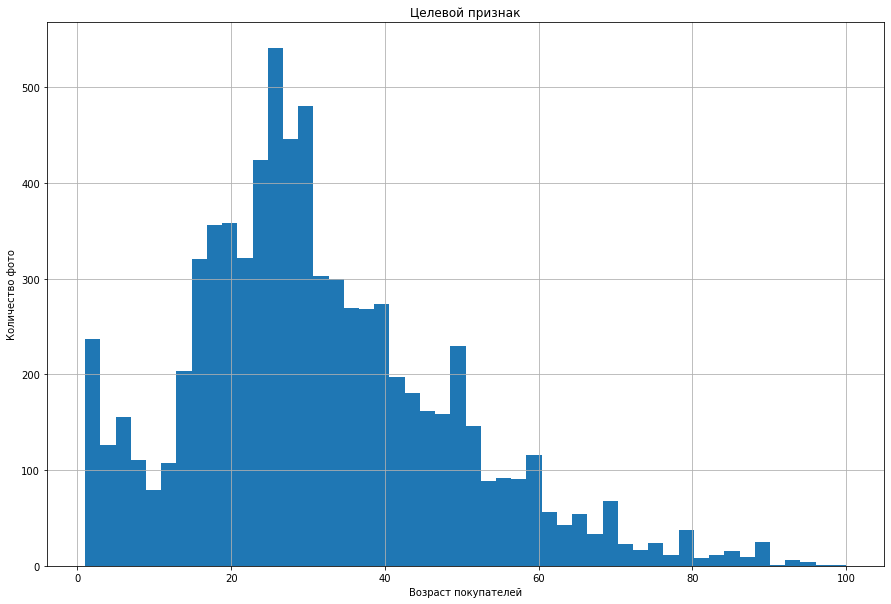

In [5]:
labels.hist(bins=50, figsize=(15,10))
plt.title('Целевой признак')
plt.xlabel('Возраст покупателей')
plt.ylabel('Количество фото');

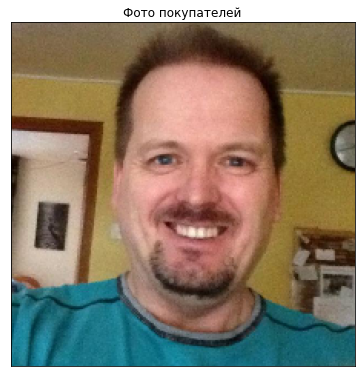

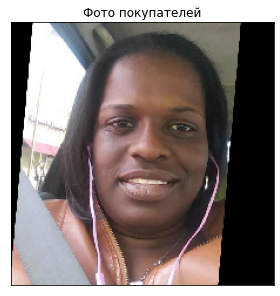

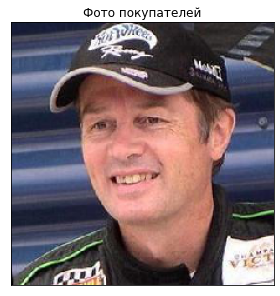

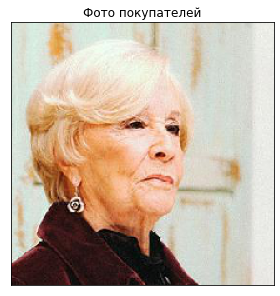

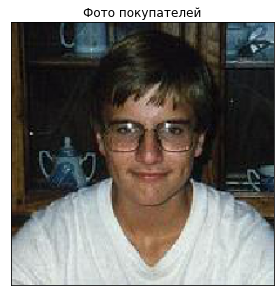

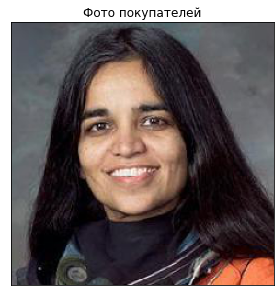

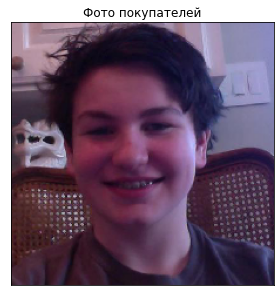

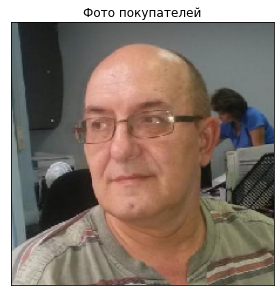

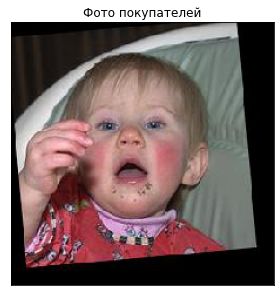

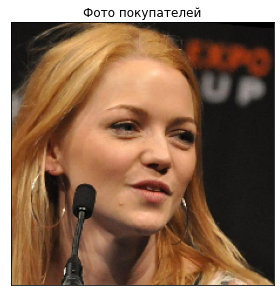

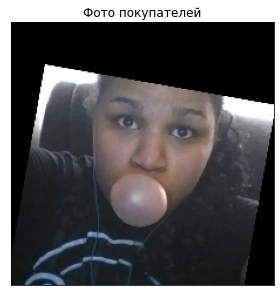

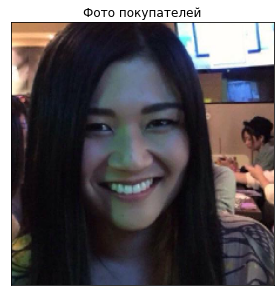

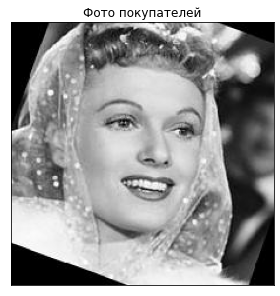

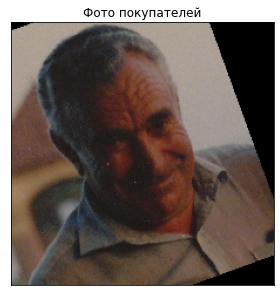

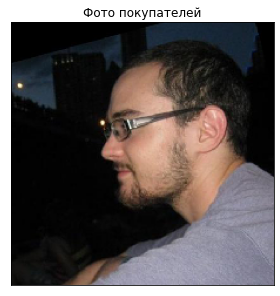

In [6]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(20,20))
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.title('Фото покупателей')
    plt.show()


#### Вывод: 
- В данных 7591 фото.
- Возраст покупателей от года до 100. 
- Средний возраст покупателя - 31 год.
- Большая часть данных для возрастов от 20 до 41.

# Обучение модели

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [7]:
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, horizontal_flip=True, rescale=1./255)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
 
    return train_gen_flow

In [8]:
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
 
    return test_gen_flow

In [9]:
def create_model(input_shape):
 
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
 
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])
 
 
    return model

In [10]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model

#### Вывод: 

Epoch 1/20
356/356 - 79s - loss: 202.4436 - mae: 10.3416 - val_loss: 604.5648 - val_mae: 19.5799

Epoch 2/20
356/356 - 49s - loss: 85.0242 - mae: 6.9799 - val_loss: 135.1574 - val_mae: 8.7761

Epoch 3/20
356/356 - 49s - loss: 56.2556 - mae: 5.6991 - val_loss: 77.7207 - val_mae: 6.7380

Epoch 4/20
356/356 - 49s - loss: 45.2039 - mae: 5.1489 - val_loss: 71.5724 - val_mae: 6.5096

Epoch 5/20
356/356 - 48s - loss: 32.7461 - mae: 4.3759 - val_loss: 73.2867 - val_mae: 6.4251

Epoch 6/20
356/356 - 46s - loss: 26.2482 - mae: 3.8984 - val_loss: 93.2678 - val_mae: 7.6032

Epoch 7/20
356/356 - 48s - loss: 21.4864 - mae: 3.5127 - val_loss: 68.7617 - val_mae: 6.1254

Epoch 8/20
356/356 - 49s - loss: 16.8529 - mae: 3.1508 - val_loss: 67.6115 - val_mae: 6.1928

Epoch 9/20
356/356 - 49s - loss: 14.2978 - mae: 2.8776 - val_loss: 63.8732 - val_mae: 5.8731

Epoch 10/20
356/356 - 49s - loss: 12.3958 - mae: 2.6700 - val_loss: 60.9227 - val_mae: 5.8149

Epoch 11/20
356/356 - 46s - loss: 12.2183 - mae: 2.6641 - val_loss: 71.7381 - val_mae: 6.3911

Epoch 12/20
356/356 - 45s - loss: 11.4092 - mae: 2.5785 - val_loss: 66.2181 - val_mae: 6.0119

Epoch 13/20
356/356 - 45s - loss: 11.4769 - mae: 2.5822 - val_loss: 82.5455 - val_mae: 6.6269

Epoch 14/20
356/356 - 45s - loss: 11.3890 - mae: 2.5460 - val_loss: 66.0133 - val_mae: 6.1076

Epoch 15/20
356/356 - 45s - loss: 11.7973 - mae: 2.6103 - val_loss: 62.7983 - val_mae: 5.9045

Epoch 16/20
356/356 - 45s - loss: 10.6043 - mae: 2.4795 - val_loss: 60.4437 - val_mae: 5.8293

Epoch 17/20
356/356 - 45s - loss: 10.1185 - mae: 2.4207 - val_loss: 58.2453 - val_mae: 5.6683

Epoch 18/20
356/356 - 45s - loss: 9.8850 - mae: 2.3802 - val_loss: 67.2332 - val_mae: 6.0930

Epoch 19/20
356/356 - 45s - loss: 9.6583 - mae: 2.3474 - val_loss: 67.0730 - val_mae: 5.9661

Epoch 20/20
356/356 - 45s - loss: 8.7324 - mae: 2.2474 - val_loss: 62.2374 - val_mae: 5.7899

**119/119 - 11s - loss: 62.2374 - mae: 5.7899
Test MAE: 5.7899**

# Анализ обученной модели

Цель исследования - постройте модель, которая по фотографии определит приблизительный возраст человека.

1) Проведен аналих данных:
- В данных 7591 фото.
- Возраст покупателей от года до 100. 
- Средний возраст покупателя - 31 год.
- Большая часть данных для возрастов от 20 до 41.

2) Данные обучены:
- Разделили данные на обучающую и тестовую выборки в соотношении 75:25
- Обучили модель ResNet50
- Получили удовлетворительный МАЕ - 5.79

Итого, цель достигнута, обученная модель показала хороший результат на тестовой выборке.